# SIT744 Assignment 1: Image Classification with Deep Feedforward Neural Network

<div class="alert-info">
    <p>Due: <strong>11:59pm 23 August 2020</strong>  (Sunday)</p>


This is an <strong>individual</strong> assignment. It contributes <strong>30%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment1_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment1_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment1_solution.ipynp </li>
<li> 123456_assignment1_output.html</li>
</ul>
</p>

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective



This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.

In this assignment, you are going to work with the Fashion-MNIST dataset for image recognition. The dataset contains 10 classes of 28x28 grayscale images. You will see some examples in the visualization task below. 

This assignment consists of five tasks.


In [1]:
#used to install tensorflow for this assignment
!pip install tensorflow
!pip install pydot
!pip install graphviz

In [2]:
#Required imports added by student
import tensorflow as tf
import IPython.display
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import logging
import sklearn
import pydot
import graphviz
import math
import time

## Task 1 Load the data

*(weight ~5%)*

Load the Fashion MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). You may get the data via Keras (keras.datasets) or Tensorflow Datasets (tfds). 

In [3]:
#Load The Data
'''
Code References:
1. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
'''
#import tensorflow and keras
from tensorflow import keras
#import dataset from keras datasets
from tensorflow.keras.datasets import fashion_mnist

#Error handling
try:
    #split into train and test for features and images
    (train_data_images, train_data_features), (test_data_images, test_data_features) = fashion_mnist.load_data()

except Exception as e:
    logging.error(e)

## Task 2 Understand the data

*(weight ~15%)*



Display 100 images from the train set in the form of 10x10 matrix.

Answer the following questions: ***** CHECK ANSWERS DOWN ******

1. What are the unique labels in this dataset?
2. How many training images and how many test images?
3. What is the size of each image?
4. Find out the numeric range of the input. Do we need to rescale the input?
5. In our problem, what are the shapes of input tensors and target tensors? Do you need to reshape the input?


This is the first 100 images displayed:



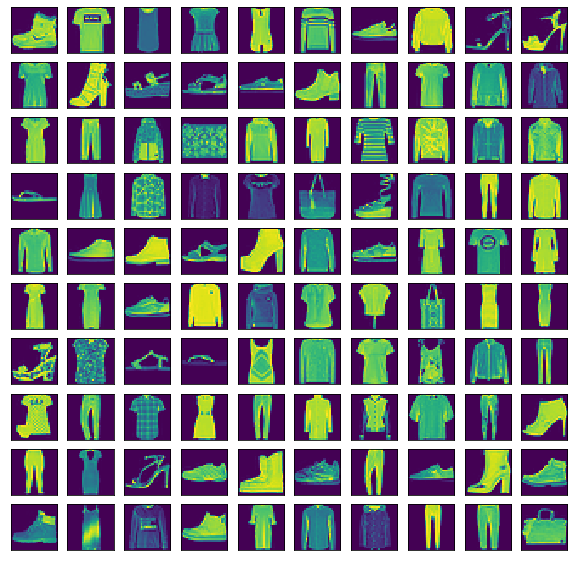

In [4]:
'''
Code References:
1.https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/
'''

from matplotlib import pyplot

#define function to display first 100 images
def display_first_100_images(image_data):
    plt.figure(figsize=(10,10))
    #For loop to iterate through each data
    for i in range(100):
        #Create subplot of 10x10 matrix 
        plt.subplot(10,10,i+1)
        #Remove the image x-axis label
        plt.xticks([])
        #Remove the image y-axis label
        plt.yticks([])
        #plot images
        plt.imshow(image_data[i])
    #show the 10x10 matrix    
    plt.show()

#Call display first 100 images function for train data
print('This is the first 100 images displayed:\n')
display_first_100_images(train_data_images)

In [5]:
'''
Code References:
1. https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
2. http://uc-r.github.io/feedforward_DNN#ff
'''
print('There are ' + str(len(np.unique(train_data_features))) +' unique labels in this dataset:\n' +str(train_data_features) + '\n')
print('There are '+ str(train_data_images.shape[0]) + ' training images in the dataset.\n')
print('There are '+ str(test_data_images.shape[0]) + ' training images in the dataset.\n')
print('The size of each image in dataset is ' + str(test_data_images.shape[1]) + 'x' + str(test_data_images.shape[2]) + '.\n')
print('The numeric range of input is from ' + str(train_data_images.min()) + ' to ' + str(train_data_images.max()) + \
      '. Therefore it is desirable to scale the input values between 0 and 1 so that it minimizes the model\
 training time by easing training and may also minimize errors associated.\n')
print('Shape of tensors is 2-D because: ' + str(train_data_images[0].shape) + '\nIn our scenario, we are using a deep feedforward \
neural network. Since Feedforward DNNs are densely connected layers, it is important reshape the input.')

There are 10 unique labels in this dataset:
[9 0 0 ... 3 0 5]

There are 60000 training images in the dataset.

There are 10000 training images in the dataset.

The size of each image in dataset is 28x28.

The numeric range of input is from 0 to 255. Therefore it is desirable to scale the input values between 0 and 1 so that it minimizes the model training time by easing training and may also minimize errors associated.

Shape of tensors is 2-D because: (28, 28)
In our scenario, we are using a deep feedforward neural network. Since Feedforward DNNs are densely connected layers, it is important reshape the input.


In [6]:
'''
Code References:
1. https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
2. https://au-lti.bbcollab.com/collab/ui/session/playback (Practical 3)
'''
#normalize input values within the range of 0 and 1 for both the train and test dataset
#value/max of values
train_data_images_rescaled = train_data_images.astype('float32') / train_data_images.max()
test_data_images_rescaled = test_data_images.astype('float32') / train_data_images.max()

#resize shape of input tensors to 1D
train_data_images_rescaled_reshaped = train_data_images_rescaled.reshape((60000, 28, 28))
test_data_images_rescaled_reshaped = test_data_images_rescaled.reshape((10000, 28, 28))
print('The new shape of tensors is now : ' + str(train_data_images_rescaled_reshaped[0].shape))

The new shape of tensors is now : (28, 28)


## Task 3 Construct an input pipeline

*(weight ~15%)*

Creat train/validate/test data splits and construct tf.data pipelines. Make sure that the training data is batched.


In [7]:
'''
Code References:
1. https://stackoverflow.com/questions/41175401/what-is-a-batch-in-tensorflow
2. https://www.youtube.com/watch?v=lOZGYzTn9Z8
3. https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
'''
from sklearn.model_selection import train_test_split

#split training data into train and validate splits
#suitable rule of thumb is 20%-80% split
train_data_images, validate_data_images, train_data_features, validate_data_features = train_test_split(
    train_data_images_rescaled_reshaped, train_data_features, test_size = 0.2)

In [8]:
'''
Code References:
1. https://www.youtube.com/watch?v=uIcqeP7MFH0
2. https://www.tensorflow.org/api_docs/python/tf/data/Dataset
3. Practical 5
4. https://cs230.stanford.edu/blog/datapipeline/
'''

#Assign batch size for training. This feeds 512 images at a time to dataset
batch_size = 100

#define and extract train and validation data from local memory and load into tf data object
train_data = tf.data.Dataset.from_tensor_slices((train_data_images, train_data_features))
validation_data = tf.data.Dataset.from_tensor_slices((validate_data_images, validate_data_features))
print('For train dataset object: ' + str(train_data))
print('For validation dataset object: ' + str(validation_data))

def preprocess_image(image, label):
    image = tf.reshape(image, [28, 28, 1])
    image = tf.cast(image, tf.float32) / 255.
    
    return image, label

train_data = train_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

validation_data = validation_data.map(
    preprocess_image, 
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

#create a function for creating pipelines with a dataset object as parameter
def create_pipeline(dataset_object):
    try:
        #shuffle elements randomly
        #buffer size kept small to reduce memory usage
        dataset_object_shuffled = dataset_object.shuffle(500)
        #divide input elements evenly
        dataset_object_batched = dataset_object_shuffled.batch(batch_size)
        #Prefetching dataset guarantees the presence of a batch anytime 
        dataset_object_prefetched = dataset_object_batched.prefetch(1)
        return dataset_object_prefetched
    except Exception as e:
        logging.error(e)

#create pipeline for training data by calling function 
train_data = create_pipeline(train_data)
#create pipeline for validation data by calling function 
validation_data = create_pipeline(validation_data)

For train dataset object: <TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float32, tf.uint8)>
For validation dataset object: <TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float32, tf.uint8)>


## Task 4 Construct a deep forward neural network

*(weight ~35%)*

### Task 4.1 Setting up a model for training

Construct a deep feedforward neural network. You need to decide and report the following configurations:

************ CHECK DOWN FOR ALL ANSWERS *****************
- Output layer: 
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
- The loss function
- The metrics for model evaluation (which may be different from the loss function)
- The optimiser

Justify your model design decisions.

Plot the model structure `using keras.utils.plot_model` or similar tools.

In [9]:
'''
Reference List:
1. https://jovianlin.io/keras-models-sequential-vs-functional/
2. https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/
3. https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
4. https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/
5. https://missinglink.ai/guides/tensorflow/tensorflow-maxpool-working-cnn-max-pooling-layers-tensorflow/
6. https://missinglink.ai/guides/keras/using-keras-flatten-operation-cnn-models-code-examples/
7. https://missinglink.ai/guides/convolutional-neural-networks/fully-connected-layers-convolutional-neural-networks-complete-guide/
8. https://datascience.stackexchange.com/questions/22760/number-and-size-of-dense-layers-in-a-cnn
'''
print('\033[1m' + '\033[91m' + 'DESIGN LOGIC EXPLANATION' + '\033[0m')

print('\nSEQUENTIAL API is used because it is great for almost all situations as out model is created through\
 a layer by layer approach. Also, there are no multiple different input sources, no multiple output destinations\
 and no reuse of layers in the model.[1]')
print('------------------------------------------------------------------------------------------------------------------')
print('\nCONVULATIONAL 2-D LAYER allows the network through the image with a convulational kernel (filter) in\
 2-D movements. It is computationally efficient and can detect important features without any human intervention.[3]')
print('\nFILTER = <64 because 3 or more layers and less complex datasets.[2]')
print('\nKERNEL SIZE = 5x5 because image sizes are smaller than 128x128. [2]')
print('\nACTIVATION FUNCTION = relu because it allows the network to converge fast and is computationally efficient.\
 Also, it allows for backpropagation. [4]')
print('------------------------------------------------------------------------------------------------------------------')
print('\nMAXPOOLING 2-D LAYER allows for reduction of input image dimentionality through the use of the maximum\
 value within convolution filter. In our case, the images are small and the number of features are also small.\
  Therefore, it reduces over-fitting. (larger dimensions lead to greater optimization complexity) [5]')
print('\nPOOL SIZE = 2x2 for reducing image dimension.')
print('------------------------------------------------------------------------------------------------------------------')
print('\nFLATTEN LAYER allows for the tranformation of a 2-D input into a vector for inputting intothe fully\
 connected layers. [6]')
print('------------------------------------------------------------------------------------------------------------------')
print('\nDENSE LAYERS/HIDDEN LAYERS allow to recognize, predict and classify images. [7]')
print('\nUsing 2 dense layers with decreasing dimensionality is better than one layer as the complexity of feature\
 extraction is handled better with increasing number of layers.[8]')
print('------------------------------------------------------------------------------------------------------------------')
print('SOFTMAX ACTIVATION is used because the result can also be interpreted as a probability distribution.')

DESIGN LOGIC EXPLANATION

SEQUENTIAL API is used because it is great for almost all situations as out model is created through a layer by layer approach. Also, there are no multiple different input sources, no multiple output destinations and no reuse of layers in the model.[1]
------------------------------------------------------------------------------------------------------------------

CONVULATIONAL 2-D LAYER allows the network through the image with a convulational kernel (filter) in 2-D movements. It is computationally efficient and can detect important features without any human intervention.[3]

FILTER = <64 because 3 or more layers and less complex datasets.[2]

KERNEL SIZE = 5x5 because image sizes are smaller than 128x128. [2]

ACTIVATION FUNCTION = relu because it allows the network to converge fast and is computationally efficient. Also, it allows for backpropagation. [4]
----------------------------------------------------------------------------------------------------

In [10]:
'''
Code Reference:
1. https://www.kaggle.com/kemalty/feed-forward-n-n-with-keras-for-fashion-mnist
2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
3. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
4. https://www.tensorflow.org/tutorials/keras/classification
5. https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a
6. https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/
7. https://missinglink.ai/guides/keras/using-keras-flatten-operation-cnn-models-code-examples/
'''
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten


#define model using sequential API
neural_network_model = models.Sequential()

#1st convolutional 2D layer 
#filter = 10 for dimensionality of output
#activation function = rectified linear unit (relu)
#kernel_size = 5 --> (5x5)
neural_network_model.add(layers.Conv2D(10, 5, padding='same', activation='relu', input_shape=(28, 28, 1)))

#1st Max Pooling 2D layer
#pool_size = 2 --> (2x2)
neural_network_model.add(layers.MaxPooling2D(2))

#2nd convolutional 2D layer
#padding = valid
#activation function = rectified linear unit (relu)
neural_network_model.add(layers.Conv2D(20, 5, padding='valid', activation='relu'))

#2nd Max Pooling 2D layer
neural_network_model.add(layers.MaxPooling2D(2))

#Flatten Layer
neural_network_model.add(layers.Flatten())

#Adding the dense/fully connected layers
#1st Layer, number of nodes = 100
#2nd Layer, number of nodes = 50
#activation function = rectified linear unit (relu)
#activation function = rectified linear unit (relu)
neural_network_model.add(layers.Dense(100, activation = 'relu'))
neural_network_model.add(layers.Dense(70, activation = 'relu'))

#Adding the output/classification layer
#activation = softmax
#number of nodes = 128
neural_network_model.add(layers.Dense(10, activation = 'softmax'))

In [11]:
'''
Reference List:
1. https://ruder.io/optimizing-gradient-descent/
2. https://datascience.stackexchange.com/questions/10523/guidelines-for-selecting-an-optimizer-for-training-neural-networks
3. https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
4. https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b
5. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
6. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
7. https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
'''
print('\033[1m' + '\033[91m' + 'OPTIMIZATION LOGIC EXPLANATION' + '\033[0m')
print('\nTo optimise out neural network, I have used gradient descent as it is one of the most preferred and best\
 ways to do so. [1]')
print('------------------------------------------------------------------------------------------------------------------')
print('\nADAPTIVE MOMENT ESTIMATION (ADAM) is chosen because: it is the most popular optimizer.[2]\
, it is very computational memory efficient.[3], it requires very less hyper-parameter tuning.[3] & it does not\
 get stuck in saddle points and local minima. [4]')
print('\nHYPER-PARAMETERS:')
print('\nLEARNING RATE = 0.01 as it works the best for ADAM on Fashion MNIST. [4]')
print('\nEPSILON = 0.1 as it works best for Image classification and default value is not good. [5]')
print('------------------------------------------------------------------------------------------------------------------')
print('\nSPARSE CATEGORICAL CROSSENTROPY is used because it supports multi-class classification problems,\
 does not require one-hot encoding of training variables and is very memory efficient. [6]')
print('\nACCURACY METRIC is used because it supports both binary and multi-class classification. [7]')


OPTIMIZATION LOGIC EXPLANATION

To optimise out neural network, I have used gradient descent as it is one of the most preferred and best ways to do so. [1]
------------------------------------------------------------------------------------------------------------------

ADAPTIVE MOMENT ESTIMATION (ADAM) is chosen because: it is the most popular optimizer.[2], it is very computational memory efficient.[3], it requires very less hyper-parameter tuning.[3] & it does not get stuck in saddle points and local minima. [4]

HYPER-PARAMETERS:

LEARNING RATE = 0.01 as it works the best for ADAM on Fashion MNIST. [4]

EPSILON = 0.1 as it works best for Image classification and default value is not good. [5]
------------------------------------------------------------------------------------------------------------------

SPARSE CATEGORICAL CROSSENTROPY is used because it supports multi-class classification problems, does not require one-hot encoding of training variables and is very memory effic

In [12]:
'''
Code References:
1. https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
2. https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b
3. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
4. https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
5. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
'''
#Define optimizer to be used
#Optimizer = Adam
#learning rate hyper-parameter is 0.001
neural_network_optimizer = tf.keras.optimizers.Adam(lr = 0.001)

#Compile neural network model
#loss function to be used = sparse_categorical_crossentropy
#metric used = accuracy
neural_network_model.compile(optimizer = neural_network_optimizer,
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [13]:
'''
Code References:
1. https://stackoverflow.com/questions/46817085/keras-interpreting-the-output-of-get-weights
'''
#Get weights for each layer
for each_neural_network_layer in neural_network_model.layers:
    print('LAYER NAME: ' + str(each_neural_network_layer.name))
    print('\nWEIGHTS: ' + str(each_neural_network_layer.get_weights()) + '\n')

LAYER NAME: conv2d

WEIGHTS: [array([[[[-0.143881  , -0.12195278, -0.10731451, -0.04936266,
           0.0568988 , -0.05824394, -0.00535703,  0.13897386,
           0.07290974, -0.12916042]],

        [[ 0.02453767,  0.13883972,  0.02897775, -0.06486462,
          -0.08296403,  0.02167976, -0.01265025,  0.0459328 ,
           0.05823524, -0.12801524]],

        [[-0.1422715 , -0.0330198 ,  0.10246453,  0.12133306,
          -0.08822365,  0.04542243,  0.00519656, -0.08851045,
           0.02311815, -0.0306235 ]],

        [[-0.11658698, -0.02501123,  0.01654008,  0.06929788,
          -0.01814906, -0.08027512,  0.01340969,  0.00546332,
           0.0549897 , -0.03445283]],

        [[-0.07458539, -0.07507896,  0.0090237 ,  0.0809353 ,
           0.1475392 , -0.11548321, -0.00449228,  0.06611066,
           0.11338308,  0.00828834]]],


       [[[ 0.03801022, -0.04310344, -0.02538019,  0.02859925,
           0.04051019, -0.03648632,  0.05149035,  0.05761479,
          -0.02852079, -0.067

Neural Network Model Summary:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 20)        5020      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               50100     
_________________________________________________________________
dense_1 (Dense)          

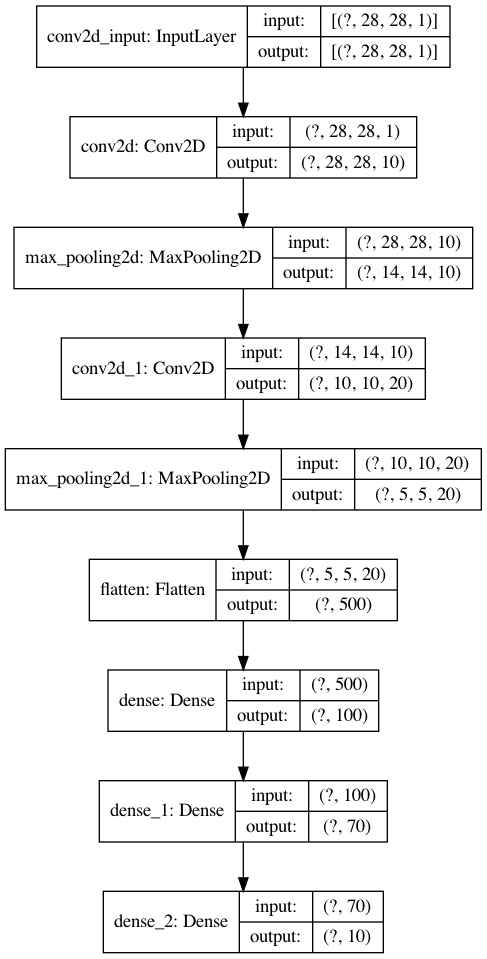

In [14]:
'''
Code References:
1. https://www.tensorflow.org/js/guide/models_and_layers
'''

#display summary output of model
print('Neural Network Model Summary:\n')
print(neural_network_model.summary())

#plot model
print('\n\nNeural Network Model Structure:\n')
tf.keras.utils.plot_model(neural_network_model, show_shapes=True)

### Task 4.2 Fitting the model

Now fit the model. Decide and report the following training setting:

** CHECK FOR ANSWERS DOWN ***

1. The training batch size
2. The number of training epochs (at least 1,000 epochs recommended)
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well. [FROM TASK 4.1, The learning rate is 0.001. CHECK 3 CELLS ABOVE 

Plot the training and validation loss and accuracy. Answer the following questions:

1. Do you see overfitting or underfitting? Why?
2. If you see overfitting, at which epoch did it happen?

In [15]:
'''
Code Reference:
1. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''
#fit train and validation data to model
#training batch size = 100
neural_network_model_training_history = neural_network_model.fit(train_data, 
                                                                 validation_data = validation_data, 
                                                                 epochs=1000)
#callbacks = neural_network_callback_list

Epoch 1/1000
480/480 [==============================] - 24s 50ms/step - loss: 1.1870 - accuracy: 0.5639 - val_loss: 0.8318 - val_accuracy: 0.6783
Epoch 2/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.7548 - accuracy: 0.7169 - val_loss: 0.7347 - val_accuracy: 0.7114
Epoch 3/1000
480/480 [==============================] - 24s 51ms/step - loss: 0.6883 - accuracy: 0.7392 - val_loss: 0.6797 - val_accuracy: 0.7337
Epoch 4/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.6505 - accuracy: 0.7533 - val_loss: 0.6502 - val_accuracy: 0.7525
Epoch 5/1000
480/480 [==============================] - 25s 51ms/step - loss: 0.6151 - accuracy: 0.7663 - val_loss: 0.6094 - val_accuracy: 0.7713
Epoch 6/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.5815 - accuracy: 0.7815 - val_loss: 0.5661 - val_accuracy: 0.7889
Epoch 7/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.5486 - accuracy: 0.7951 - val_loss: 0.5305 -

Epoch 57/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.2403 - accuracy: 0.9107 - val_loss: 0.3161 - val_accuracy: 0.8879
Epoch 58/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.2377 - accuracy: 0.9106 - val_loss: 0.3056 - val_accuracy: 0.8924
Epoch 59/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.2343 - accuracy: 0.9121 - val_loss: 0.3123 - val_accuracy: 0.8887
Epoch 60/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.2350 - accuracy: 0.9128 - val_loss: 0.3238 - val_accuracy: 0.8847
Epoch 61/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.2326 - accuracy: 0.9119 - val_loss: 0.3159 - val_accuracy: 0.8878
Epoch 62/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.2304 - accuracy: 0.9134 - val_loss: 0.3246 - val_accuracy: 0.8867
Epoch 63/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.2283 - accuracy: 0.9146 - val_loss: 0

480/480 [==============================] - 23s 49ms/step - loss: 0.1242 - accuracy: 0.9535 - val_loss: 0.4520 - val_accuracy: 0.8857
Epoch 168/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.1235 - accuracy: 0.9536 - val_loss: 0.4562 - val_accuracy: 0.8879
Epoch 169/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.1218 - accuracy: 0.9545 - val_loss: 0.4522 - val_accuracy: 0.8885
Epoch 170/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.1225 - accuracy: 0.9541 - val_loss: 0.4677 - val_accuracy: 0.8867
Epoch 171/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.1226 - accuracy: 0.9547 - val_loss: 0.4521 - val_accuracy: 0.8883
Epoch 172/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.1215 - accuracy: 0.9535 - val_loss: 0.4542 - val_accuracy: 0.8886
Epoch 173/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.1183 - accuracy: 0.9551 - val_loss: 0.4521 - 

480/480 [==============================] - 24s 49ms/step - loss: 0.0736 - accuracy: 0.9721 - val_loss: 0.6828 - val_accuracy: 0.8868
Epoch 278/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.0744 - accuracy: 0.9724 - val_loss: 0.6920 - val_accuracy: 0.8863
Epoch 279/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.0706 - accuracy: 0.9733 - val_loss: 0.6979 - val_accuracy: 0.8853
Epoch 280/1000
480/480 [==============================] - 26s 54ms/step - loss: 0.0720 - accuracy: 0.9725 - val_loss: 0.6941 - val_accuracy: 0.8878
Epoch 281/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.0711 - accuracy: 0.9734 - val_loss: 0.7023 - val_accuracy: 0.8867
Epoch 282/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0692 - accuracy: 0.9742 - val_loss: 0.7005 - val_accuracy: 0.8885
Epoch 283/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0689 - accuracy: 0.9746 - val_loss: 0.7023 - 

480/480 [==============================] - 23s 48ms/step - loss: 0.0485 - accuracy: 0.9820 - val_loss: 0.9636 - val_accuracy: 0.8830
Epoch 388/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0424 - accuracy: 0.9849 - val_loss: 0.9452 - val_accuracy: 0.8831
Epoch 389/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0453 - accuracy: 0.9830 - val_loss: 0.9574 - val_accuracy: 0.8846
Epoch 390/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0479 - accuracy: 0.9820 - val_loss: 0.9856 - val_accuracy: 0.8832
Epoch 391/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0479 - accuracy: 0.9823 - val_loss: 0.9664 - val_accuracy: 0.8852
Epoch 392/1000
480/480 [==============================] - 22s 47ms/step - loss: 0.0482 - accuracy: 0.9824 - val_loss: 0.9955 - val_accuracy: 0.8848
Epoch 393/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0557 - accuracy: 0.9794 - val_loss: 0.9753 - 

480/480 [==============================] - 23s 49ms/step - loss: 0.0403 - accuracy: 0.9851 - val_loss: 1.2749 - val_accuracy: 0.8808
Epoch 498/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0338 - accuracy: 0.9872 - val_loss: 1.2336 - val_accuracy: 0.8818
Epoch 499/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0325 - accuracy: 0.9874 - val_loss: 1.2371 - val_accuracy: 0.8832
Epoch 500/1000
480/480 [==============================] - 22s 47ms/step - loss: 0.0320 - accuracy: 0.9887 - val_loss: 1.2240 - val_accuracy: 0.8832
Epoch 501/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0330 - accuracy: 0.9880 - val_loss: 1.2718 - val_accuracy: 0.8829
Epoch 502/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0419 - accuracy: 0.9847 - val_loss: 1.2400 - val_accuracy: 0.8796
Epoch 503/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0314 - accuracy: 0.9881 - val_loss: 1.2165 - 

480/480 [==============================] - 23s 48ms/step - loss: 0.0301 - accuracy: 0.9890 - val_loss: 1.4065 - val_accuracy: 0.8851
Epoch 608/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0293 - accuracy: 0.9894 - val_loss: 1.3857 - val_accuracy: 0.8867
Epoch 609/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0253 - accuracy: 0.9905 - val_loss: 1.3753 - val_accuracy: 0.8839
Epoch 610/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0213 - accuracy: 0.9924 - val_loss: 1.4653 - val_accuracy: 0.8824
Epoch 611/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0426 - accuracy: 0.9851 - val_loss: 1.4232 - val_accuracy: 0.8821
Epoch 612/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0334 - accuracy: 0.9880 - val_loss: 1.4200 - val_accuracy: 0.8836
Epoch 613/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0263 - accuracy: 0.9901 - val_loss: 1.4232 - 

480/480 [==============================] - 24s 49ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 1.6235 - val_accuracy: 0.8828
Epoch 718/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0310 - accuracy: 0.9892 - val_loss: 1.6146 - val_accuracy: 0.8832
Epoch 719/1000
480/480 [==============================] - 23s 49ms/step - loss: 0.0207 - accuracy: 0.9921 - val_loss: 1.6510 - val_accuracy: 0.8817
Epoch 720/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 1.6052 - val_accuracy: 0.8849
Epoch 721/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 1.6108 - val_accuracy: 0.8843
Epoch 722/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0250 - accuracy: 0.9903 - val_loss: 1.6172 - val_accuracy: 0.8823
Epoch 723/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0180 - accuracy: 0.9935 - val_loss: 1.5982 - 

480/480 [==============================] - 23s 48ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 1.7143 - val_accuracy: 0.8848
Epoch 828/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 1.7251 - val_accuracy: 0.8815
Epoch 829/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0164 - accuracy: 0.9939 - val_loss: 1.7160 - val_accuracy: 0.8843
Epoch 830/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 1.7628 - val_accuracy: 0.8798
Epoch 831/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 1.7504 - val_accuracy: 0.8795
Epoch 832/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 1.7454 - val_accuracy: 0.8823
Epoch 833/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0203 - accuracy: 0.9929 - val_loss: 1.7357 - 

480/480 [==============================] - 23s 47ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 1.8439 - val_accuracy: 0.8830
Epoch 938/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 1.8461 - val_accuracy: 0.8868
Epoch 939/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 1.8834 - val_accuracy: 0.8808
Epoch 940/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 1.8962 - val_accuracy: 0.8822
Epoch 941/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 1.8994 - val_accuracy: 0.8838
Epoch 942/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 1.9243 - val_accuracy: 0.8837
Epoch 943/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 1.8943 - 

Metrics Collected: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


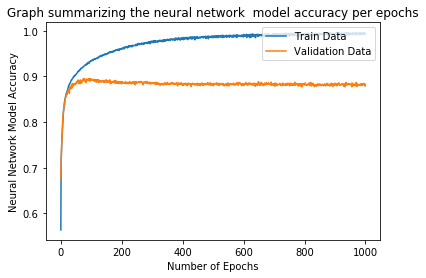

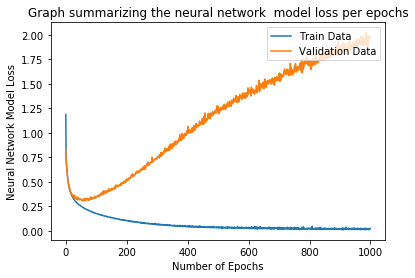

In [16]:
'''
Code References:
1. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''

#Check the metrics collected
print('Metrics Collected: ' + str(neural_network_model_training_history.history.keys()))

##Plotting the accuracy metric data after traning
plt.plot(neural_network_model_training_history.history['accuracy'])
plt.plot(neural_network_model_training_history.history['val_accuracy'])
plt.title('Graph summarizing the neural network  model accuracy per epochs')
plt.ylabel('Neural Network Model Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train Data', 'Validation Data'], loc='upper right')
plt.show()

##Plotting the loss metric data after traning
plt.plot(neural_network_model_training_history.history['loss'])
plt.plot(neural_network_model_training_history.history['val_loss'])
plt.title('Graph summarizing the neural network  model loss per epochs')
plt.ylabel('Neural Network Model Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train Data', 'Validation Data'], loc='upper right')
plt.show()

In [17]:
print('\033[1m' + '\033[91m' + 'GRAPHS INTERPRETATION' + '\033[0m')
print('\nAfter Epochs Number is approximately around 25-30, the training data is predicted with slightly higher\
 accuracy as compared to that of the training data. Therefore, we can say that there is quite some overfitting.')

GRAPHS INTERPRETATION

After Epochs Number is approaximately around 25-30, the training data is predicted with slightly higher accuracy as compared to that of the training data. Therefore, we can say that there is quite some overfitting.


### Task 4.3 Check the convergence through gradient

Use  TensorBoard to check the gradients. 

*** CHECK ANSWERS DOWN ***
- Do you see vanishing or exploding gradients?
- Use the gradient norm to check if the training has converged to a local minimum.

Show screenshots of your TensorBoard output.

In [18]:
'''
Code References:
1. https://www.youtube.com/watch?v=2U6Jl7oqRkM
2. https://www.datacamp.com/community/tutorials/tensorboard-tutorial
3. Practical 3
'''

from datetime import datetime
import os

#loading the tensorboard notebook extension into jupyter notebook
%load_ext tensorboard

#clearing all logs previous runs
!rm -rf ./logs/ 

#insert callbacks for tensorboard
callback_for_tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)

neural_network_model_training_tensorboard = neural_network_model.fit(train_data, validation_data = validation_data, 
                                                                     epochs = 1000, callbacks=callback_for_tensorboard)

Epoch 1/1000
  1/480 [..............................] - ETA: 0s - loss: 0.0713 - accuracy: 0.9700WARNING:tensorflow:From /Users/akbar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
480/480 [==============================] - 24s 49ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 1.9193 - val_accuracy: 0.8830
Epoch 2/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 1.9607 - val_accuracy: 0.8822
Epoch 3/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0197 - accuracy: 0.9930 - val_loss: 1.9350 - val_accuracy: 0.8819
Epoch 4/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 1.9718 - val_accuracy: 0.8825
Epoch 5/1000
480/480 [================

Epoch 110/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 2.0890 - val_accuracy: 0.8814
Epoch 111/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0155 - accuracy: 0.9944 - val_loss: 2.0828 - val_accuracy: 0.8820
Epoch 112/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 2.0657 - val_accuracy: 0.8838
Epoch 113/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 2.0905 - val_accuracy: 0.8848
Epoch 114/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0124 - accuracy: 0.9955 - val_loss: 2.1083 - val_accuracy: 0.8817
Epoch 115/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 2.0789 - val_accuracy: 0.8826
Epoch 116/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0249 - accuracy: 0.9920 - val_

480/480 [==============================] - 23s 47ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 2.2393 - val_accuracy: 0.8785
Epoch 221/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 2.2830 - val_accuracy: 0.8785
Epoch 222/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 2.1810 - val_accuracy: 0.8813
Epoch 223/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 2.1692 - val_accuracy: 0.8842
Epoch 224/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 2.2557 - val_accuracy: 0.8829
Epoch 225/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 2.2362 - val_accuracy: 0.8835
Epoch 226/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 2.2141 - 

480/480 [==============================] - 23s 47ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 2.3202 - val_accuracy: 0.8796
Epoch 331/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 2.3129 - val_accuracy: 0.8823
Epoch 332/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 2.3656 - val_accuracy: 0.8830
Epoch 333/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 2.2826 - val_accuracy: 0.8815
Epoch 334/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 2.2789 - val_accuracy: 0.8796
Epoch 335/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 2.4022 - val_accuracy: 0.8815
Epoch 336/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 2.3148 - 

480/480 [==============================] - 23s 48ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 2.3968 - val_accuracy: 0.8835
Epoch 441/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 2.4033 - val_accuracy: 0.8842
Epoch 442/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 2.4910 - val_accuracy: 0.8823
Epoch 443/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 2.4422 - val_accuracy: 0.8811
Epoch 444/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 2.4832 - val_accuracy: 0.8827
Epoch 445/1000
480/480 [==============================] - 23s 48ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 2.4546 - val_accuracy: 0.8827
Epoch 446/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 2.4978 - 

480/480 [==============================] - 23s 48ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 2.4758 - val_accuracy: 0.8852
Epoch 551/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 2.4556 - val_accuracy: 0.8822
Epoch 552/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 2.4045 - val_accuracy: 0.8835
Epoch 553/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 2.5097 - val_accuracy: 0.8832
Epoch 554/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0272 - accuracy: 0.9929 - val_loss: 2.5842 - val_accuracy: 0.8800
Epoch 555/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 2.4872 - val_accuracy: 0.8838
Epoch 556/1000
480/480 [==============================] - 23s 47ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 2.5534 - 

480/480 [==============================] - 24s 49ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 2.6362 - val_accuracy: 0.8807
Epoch 661/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 2.5663 - val_accuracy: 0.8804
Epoch 662/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 2.6235 - val_accuracy: 0.8829
Epoch 663/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 2.7072 - val_accuracy: 0.8792
Epoch 664/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 2.6173 - val_accuracy: 0.8818
Epoch 665/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 2.6184 - val_accuracy: 0.8824
Epoch 666/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 2.6953 - 

480/480 [==============================] - 24s 49ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 2.6504 - val_accuracy: 0.8829
Epoch 771/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 2.7163 - val_accuracy: 0.8814
Epoch 772/1000
480/480 [==============================] - 24s 49ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 2.6263 - val_accuracy: 0.8817
Epoch 773/1000
480/480 [==============================] - 25s 52ms/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 2.6296 - val_accuracy: 0.8834
Epoch 774/1000
480/480 [==============================] - 24s 51ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 2.6864 - val_accuracy: 0.8819
Epoch 775/1000
480/480 [==============================] - 24s 51ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 2.6440 - val_accuracy: 0.8832
Epoch 776/1000
480/480 [==============================] - 24s 50ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 2.6981 - 

480/480 [==============================] - 31s 65ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 2.8193 - val_accuracy: 0.8827
Epoch 881/1000
480/480 [==============================] - 32s 66ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 2.7236 - val_accuracy: 0.8851
Epoch 882/1000
480/480 [==============================] - 29s 61ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 2.7486 - val_accuracy: 0.8823
Epoch 883/1000
480/480 [==============================] - 30s 63ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 2.7173 - val_accuracy: 0.8819
Epoch 884/1000
480/480 [==============================] - 35s 72ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 2.6852 - val_accuracy: 0.8813
Epoch 885/1000
480/480 [==============================] - 31s 64ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 2.7893 - val_accuracy: 0.8831
Epoch 886/1000
480/480 [==============================] - 24s 51ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 2.7093 - 

480/480 [==============================] - 24s 49ms/step - loss: 0.0178 - accuracy: 0.9952 - val_loss: 2.7974 - val_accuracy: 0.8840
Epoch 991/1000
480/480 [==============================] - 24s 51ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 2.7537 - val_accuracy: 0.8848
Epoch 992/1000
480/480 [==============================] - 28s 59ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 2.8033 - val_accuracy: 0.8832
Epoch 993/1000
480/480 [==============================] - 25s 52ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 2.9232 - val_accuracy: 0.8829
Epoch 994/1000
480/480 [==============================] - 29s 61ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 2.7645 - val_accuracy: 0.8841
Epoch 995/1000
480/480 [==============================] - 28s 58ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 2.8016 - val_accuracy: 0.8845
Epoch 996/1000
480/480 [==============================] - 29s 61ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 2.7543 - 

In [39]:
#loading the tensorboard notebook extension into jupyter notebook
%reload_ext tensorboard
%tensorboard --logdir ./Graph

Reusing TensorBoard on port 6011 (pid 5934), started 1 day, 23:00:45 ago. (Use '!kill 5934' to kill it.)

In [2]:
print('Based on the histograms (kernel ones), for:\n1. Convolutional Layer 1 = Vanishing\n2. \
Convolutional Layer 2 = Vanishing\n3. Dense 1 = Vanishing\n4. Dense 2 = Vanishing\n5. Dense Output = Vanishing\n\
This is because the histograms are mostly very narrow and the peak is at 0. Therefore, vanishing gradient.')

print('\nBased on the distributions and histograms, it can be seen deduced that the model is suffering from local \
minima issue because the weights of the layers not not seem to improve for each layer.')

Based on the histograms (kernel ones), for:
1. Convolutional Layer 1 = Vanishing
2. Convolutional Layer 2 = Vanishing
3. Dense 1 = Vanishing
4. Dense 2 = Vanishing
5. Dense Output = Vanishing
This is because the histograms are mostly very narrow and the peak is at 0. Therefore, vanishing gradient.

Based on the distributions and histograms, it can be seen deduced that the model is suffering from local minima issue because the weights of the layers not not seem to improve for each layer.


Screenshot of Convolutional layer histogram:

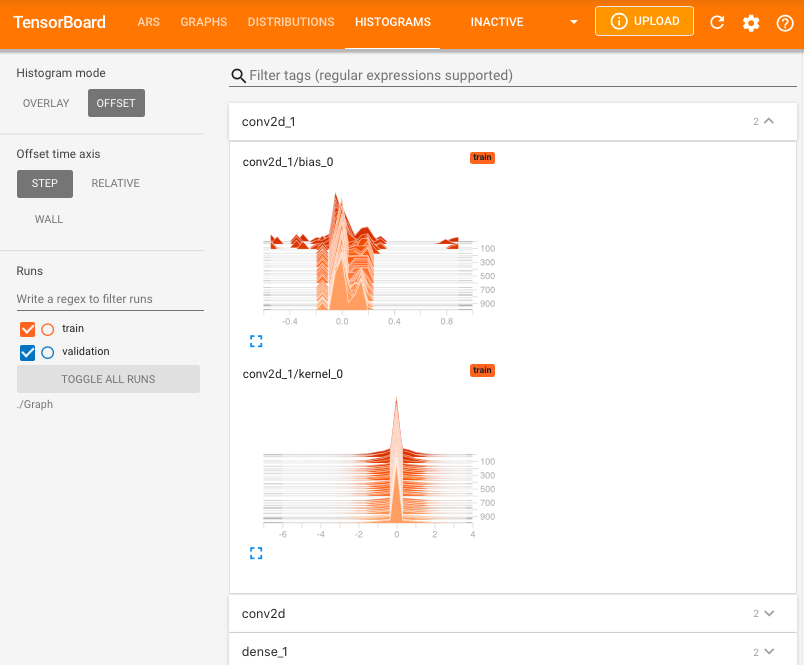

Screenshot of Dense layer histogram:

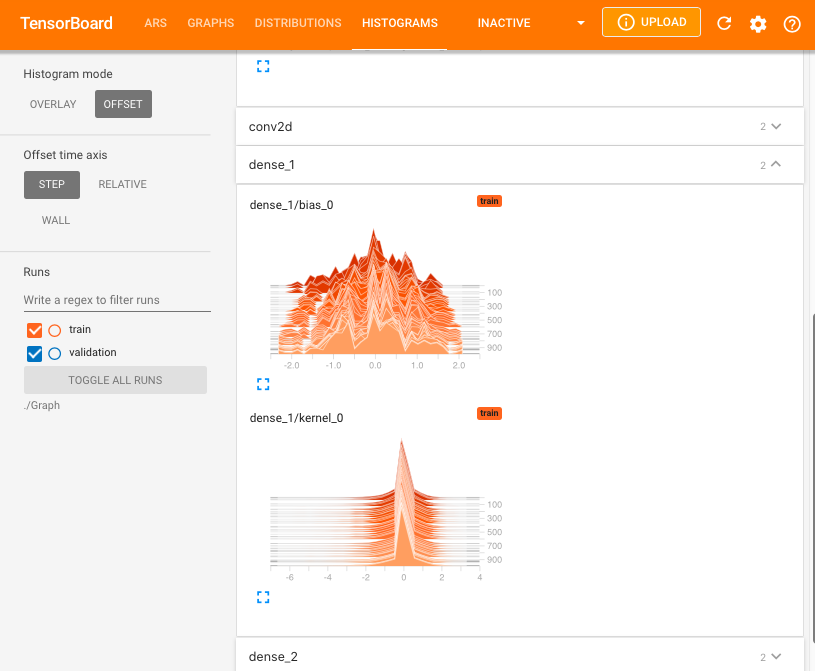

Screenshot of Convolutional layer Distribution:

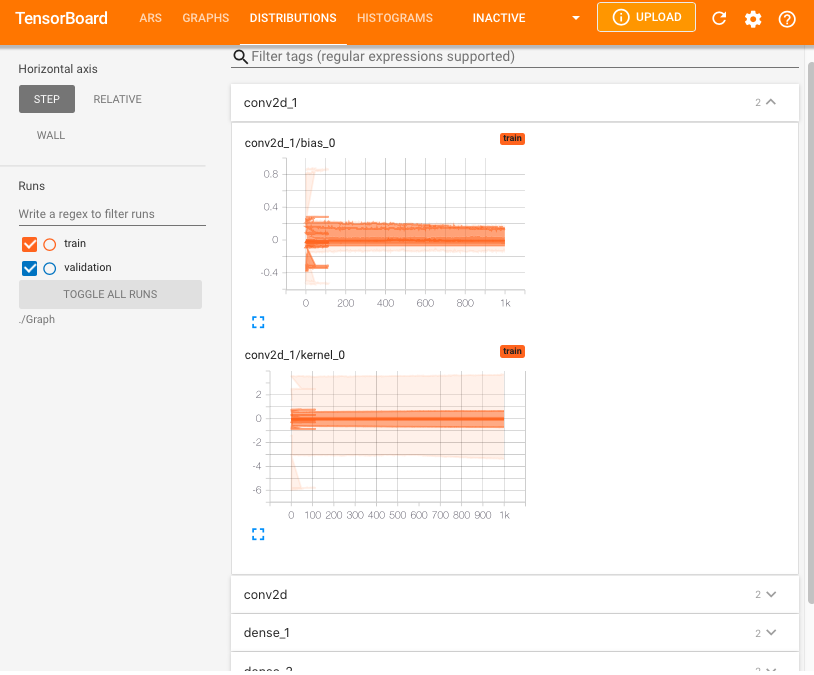

Screenshot of Dense layer Distribution:

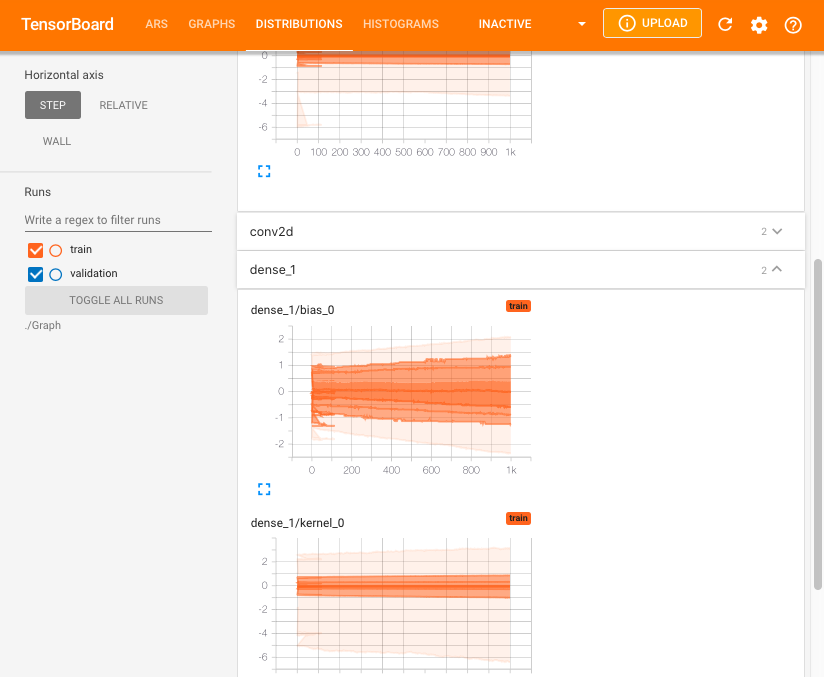

## Task 5 Fine-tuning the model

*(weight ~30%)*

You may see above that your model is overfitting. There are multiple things you can do. Below are some options:

1. Add dropout
2. Add Batch Normalisation
3. Add layer-specific weight regularizations
4. Change the learning rate

Apply different regularisation techniques to the model training. You may also try other techniques for improving training such as learning rate scheduling (see https://www.tensorflow.org/guide/keras/train_and_evaluate#using_learning_rate_schedules).

Run **five or more** experiments of different training configurations and record the test accuracy achieved in the Markdown table below. You may modify the table heading to match your experiment design.



|Dropout (rate)   | Batch Normalisation (Y/N)  | Optimiser  | Learning Rate  | Number of Epochs   |  ReduceLROnPlateau (Y/N) |   EarlyStopping (Y/N)   |   Test Accuracy (%) |
|----|----|----|----|----|----|----|-----|
|0.1 | Y  |Adam|0.01| 15 | Y  | Y  |88.54|
|0.2 | Y  |Adam|0.01| 15 | Y  | Y  |88.64|
|0.3 | Y  |Adam|0.01| 15 | Y  | Y  |88.62|
|0.1 | Y  |Adam|0.01| 25 | Y  | Y  |88.57|
|0.2 | Y  |Adam|0.01| 25 | Y  | Y  |88.67|
|0.3 | Y  |Adam|0.01| 25 | Y  | Y  |88.72|
|0.1 | Y  |Adam|0.01| 35 | Y  | Y  |88.67|
|0.2 | Y  |Adam|0.01| 35 | Y  | Y  |88.57|
|0.3 | Y  |Adam|0.01| 35 | Y  | Y  |88.65|
|0.1 | Y  |Adam|0.1 | 15 | Y  | Y  |88.72|
|0.2 | Y  |Adam|0.1 | 15 | Y  | Y  |88.59|
|0.3 | Y  |Adam|0.1 | 15 | Y  | Y  |88.52|
|0.1 | Y  |Adam|0.1 | 25 | Y  | Y  |88.48|
|0.2 | Y  |Adam|0.1 | 25 | Y  | Y  |88.65|
|0.3 | Y  |Adam|0.1 | 25 | Y  | Y  |88.67|
|0.1 | Y  |Adam|0.1 | 35 | Y  | Y  |88.55|
|0.2 | Y  |Adam|0.1 | 35 | Y  | Y  |88.60|
|0.3 | Y  |Adam|0.1 | 35 | Y  | Y  |88.55|
|0.1 | Y  |SGD |0.01| 15 | Y  | Y  |88.69|
|0.2 | Y  |SGD |0.01| 15 | Y  | Y  |88.63|
|0.3 | Y  |SGD |0.01| 15 | Y  | Y  |88.74|
|0.1 | Y  |SGD |0.01| 25 | Y  | Y  |88.68|
|0.2 | Y  |SGD |0.01| 25 | Y  | Y  |88.71|
|0.3 | Y  |SGD |0.01| 25 | Y  | Y  |88.60|
|0.1 | Y  |SGD |0.01| 35 | Y  | Y  |88.85|
|0.2 | Y  |SGD |0.01| 35 | Y  | Y  |88.57|
|0.3 | Y  |SGD |0.01| 35 | Y  | Y  |88.73|
|0.1 | Y  |SGD |0.1 | 15 | Y  | Y  |88.57|
|0.2 | Y  |SGD |0.1 | 15 | Y  | Y  |88.52|
|0.3 | Y  |SGD |0.1 | 15 | Y  | Y  |88.56|
|0.1 | Y  |SGD |0.1 | 25 | Y  | Y  |88.57|
|0.2 | Y  |SGD |0.1 | 25 | Y  | Y  |88.64|
|0.3 | Y  |SGD |0.1 | 25 | Y  | Y  |88.75|
|0.1 | Y  |SGD |0.1 | 35 | Y  | Y  |88.61|
|0.2 | Y  |SGD |0.1 | 35 | Y  | Y  |88.88|
|0.3 | Y  |SGD |0.1 | 35 | Y  | Y  |88.56|


Answer the following questions:

1. Which configuration achieved the best test accuracy?
2. Which setting had the most impact and which one had the least impact?

In [34]:
#Answer 1
print('Settings with the best accuracyof 88.88%:\n' + 'Dropout rate = 0.2, Batch Normalisation = Y, Optimizer = SGD,\
Learning Rate = 0.1, Number of Epochs = 35, ReduceLROnPlateau = Y & EarlyStopping = Y')
print('\n-----------------------------------------------------------------------------------------------------------------\n')
#Answers 2
print('Setting with the most impact: Drop Out Rate')
print('Setting with the least impact: Number of Epochs')

Settings with the best accuracyof 88.88%:
Dropout rate = 0.2, Batch Normalisation = Y, Optimizer = SGD,Learning Rate = 0.1, Number of Epochs = 35, ReduceLROnPlateau = Y & EarlyStopping = Y

-----------------------------------------------------------------------------------------------------------------

Setting with the most impact: Drop Out Rate
Setting with the least impact: Number of Epochs


In [20]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

neural_network_optimizer1 = tf.keras.optimizers.Adam(lr = 0.01)
neural_network_optimizer2 = tf.keras.optimizers.Adam(lr = 0.1)
neural_network_optimizer3 = tf.keras.optimizers.SGD(lr = 0.1)
neural_network_optimizer4 = tf.keras.optimizers.SGD(lr = 0.01)

number_of_epochs_list = [15, 25, 35]
drop_out_rates_list = [0.1, 0.2, 0.3]

def dynamic_model_creation(dropout_rate, optimizer, callback_list, epochs_number):
    neural_network_model_tbt = models.Sequential()
    neural_network_model_tbt.add(layers.Conv2D(10, 5, padding='same', activation='relu', input_shape=(28, 28, 1)))
    neural_network_model_tbt.add(layers.MaxPooling2D(2))
    neural_network_model_tbt.add(layers.Conv2D(20, 5, padding='valid', activation='relu'))
    #Batch Normalization Layer added
    neural_network_model_tbt.add(BatchNormalization())
    #Dropout Layer added
    neural_network_model_tbt.add(Dropout(dropout_rate))
    neural_network_model_tbt.add(layers.MaxPooling2D(2))
    neural_network_model_tbt.add(layers.Flatten())
    neural_network_model_tbt.add(layers.Dense(100, activation = 'relu'))
    neural_network_model_tbt.add(layers.Dense(70, activation = 'relu'))
    neural_network_model_tbt.add(layers.Dense(10, activation = 'softmax'))
    #compile dynamic model
    neural_network_model_tbt.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return neural_network_model.fit(train_data, validation_data = validation_data, epochs = epochs_number, callbacks = callback_list)

In [21]:
'''
Reference List:
1. https://www.kdnuggets.com/2019/08/keras-callbacks-explained-three-minutes.html
2. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
3. https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
'''
print('\033[1m' + '\033[91m' + 'MODEL FITTING LOGIC EXPLANATION' + '\033[0m')
print('\nCALLBACKS are important to monitor and improve the neural network model during fitting/training in order\
to avoid overfitting or underfitting.[1]')
print('\nEARLYSTOPPING is used as ensures that a model\'s training is stopped early to avoid overfitting.[1]')
print('\nREDUCELRONPLATEAU is used to decrease the learning rate when the accuracy metric has improved to the \
maximum possible level. [3]')
print('\nLEARNINGRATESCHEDULER is used to decrease the learning rate when the accuracy metric has improved to the \
maximum possible level. [3]')
print('------------------------------------------------------------------------------------------------------------------')
print('\nPATIENCE = 10 means 10 epochs with no improvements after which learning rate is reduced. [2]')
print('\VERBOSE = 1 means update messages. [2]')

MODEL FITTING LOGIC EXPLANATION

CALLBACKS are important to monitor and improve the neural network model during fitting/training in orderto avoid overfitting or underfitting.[1]

EARLYSTOPPING is used as ensures that a model's training is stopped early to avoid overfitting.[1]

REDUCELRONPLATEAU is used to decrease the learning rate when the accuracy metric has improved to the maximum possible level. [3]

LEARNINGRATESCHEDULER is used to decrease the learning rate when the accuracy metric has improved to the maximum possible level. [3]
------------------------------------------------------------------------------------------------------------------

PATIENCE = 10 means 10 epochs with no improvements after which learning rate is reduced. [2]
\VERBOSE = 1 means update messages. [2]


In [22]:
'''
Code References:
1. https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
2. https://towardsdatascience.com/learning-rate-scheduler-d8a55747dd90
'''
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Assign initial learning rate configuration as 0.001
initial_neural_network_learning_rate = 0.001
#Assign learining rate drop as 0.3
drop_learning_rate = 0.3
#Assign epoch drop as 10
drop_epoch = 10

#create the learining rate scheduler function
def neural_network_learning_rate(epoch):
    #calculate neural network learning rate
    neural_network_learning_rate = initial_neural_network_learning_rate * math.pow(drop_learning_rate, 
                                                                                   math.floor((1+epoch)/drop_epoch))
    return neural_network_learning_rate

#append callbacks to callback list
#in this case, I used 3 callbacks
neural_network_callback_list = [ReduceLROnPlateau(monitor='loss', patience=10, verbose=1),
                                #monitor for minimal validation loss
                                EarlyStopping(monitor='loss', mode='min', patience=10, verbose=1),
                                LearningRateScheduler(neural_network_learning_rate)]


In [23]:
#run first set of test (Optimizer = Adam, learning rate = 0.01)
#iterate through epochs list
for each_epochs in number_of_epochs_list:
    #iterate through drop out rates list
    for each_dropout in drop_out_rates_list:
        #print configuration
        print('\nEpochs:', each_epochs, ' Drop-out rate: ', each_dropout)
        dynamic_model_creation(each_dropout, neural_network_optimizer1, neural_network_callback_list, each_epochs)


Epochs: 15  Drop-out rate:  0.1
Epoch 1/15
480/480 [==============================] - 28s 59ms/step - loss: 0.0243 - accuracy: 0.9937 - val_loss: 2.9206 - val_accuracy: 0.8846
Epoch 2/15
480/480 [==============================] - 31s 65ms/step - loss: 0.0187 - accuracy: 0.9952 - val_loss: 2.8499 - val_accuracy: 0.8821
Epoch 3/15
480/480 [==============================] - 36s 75ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 2.9195 - val_accuracy: 0.8843
Epoch 4/15
480/480 [==============================] - 26s 54ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 2.8878 - val_accuracy: 0.8859
Epoch 5/15
480/480 [==============================] - 31s 64ms/step - loss: 0.0275 - accuracy: 0.9931 - val_loss: 2.8671 - val_accuracy: 0.8825
Epoch 6/15
480/480 [==============================] - 29s 59ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 2.7894 - val_accuracy: 0.8832
Epoch 7/15
480/480 [==============================] - 26s 54ms/step - loss: 0.0073 - accuracy: 0.9974 -

Epoch 4/35
480/480 [==============================] - 26s 54ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 2.7426 - val_accuracy: 0.8860
Epoch 5/35
480/480 [==============================] - 32s 66ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 2.7887 - val_accuracy: 0.8855
Epoch 6/35
480/480 [==============================] - 25s 52ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 2.8013 - val_accuracy: 0.8829
Epoch 7/35
480/480 [==============================] - 28s 58ms/step - loss: 0.0330 - accuracy: 0.9919 - val_loss: 2.8580 - val_accuracy: 0.8846
Epoch 8/35
480/480 [==============================] - 28s 59ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 2.7990 - val_accuracy: 0.8853
Epoch 9/35
480/480 [==============================] - 24s 49ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 2.8003 - val_accuracy: 0.8857
Epoch 10/35
480/480 [==============================] - 28s 59ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 2.7598 - val_accuracy

In [24]:
#run first set of test (Optimizer = Adam, learning rate = 0.1)
#iterate through epochs list
for each_epochs in number_of_epochs_list:
    #iterate through drop out rates list
    for each_dropout in drop_out_rates_list:
        #print configuration
        print('\nEpochs:', each_epochs, ' Drop-out rate: ', each_dropout)
        dynamic_model_creation(each_dropout, neural_network_optimizer2, neural_network_callback_list, each_epochs)


Epochs: 15  Drop-out rate:  0.1
Epoch 1/15
480/480 [==============================] - 34s 71ms/step - loss: 0.1185 - accuracy: 0.9831 - val_loss: 2.7198 - val_accuracy: 0.8825
Epoch 2/15
480/480 [==============================] - 34s 72ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 2.8401 - val_accuracy: 0.8810
Epoch 3/15
480/480 [==============================] - 28s 59ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 2.7821 - val_accuracy: 0.8848
Epoch 4/15
480/480 [==============================] - 28s 59ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 2.7402 - val_accuracy: 0.8847
Epoch 5/15
480/480 [==============================] - 25s 53ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 2.7749 - val_accuracy: 0.8848
Epoch 6/15
480/480 [==============================] - 32s 66ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 2.7637 - val_accuracy: 0.8829
Epoch 7/15
480/480 [==============================] - 30s 62ms/step - loss: 0.0172 - accuracy: 0.9950 -

480/480 [==============================] - 24s 50ms/step - loss: 2.1345e-04 - accuracy: 1.0000 - val_loss: 2.7383 - val_accuracy: 0.8864
Epoch 17/25
480/480 [==============================] - 23s 48ms/step - loss: 1.8904e-04 - accuracy: 1.0000 - val_loss: 2.7411 - val_accuracy: 0.8863
Epoch 18/25
480/480 [==============================] - 23s 48ms/step - loss: 1.6989e-04 - accuracy: 1.0000 - val_loss: 2.7473 - val_accuracy: 0.8864
Epoch 19/25
480/480 [==============================] - 23s 48ms/step - loss: 1.5808e-04 - accuracy: 1.0000 - val_loss: 2.7503 - val_accuracy: 0.8863
Epoch 20/25
480/480 [==============================] - 24s 50ms/step - loss: 1.7333e-04 - accuracy: 1.0000 - val_loss: 2.7449 - val_accuracy: 0.8869
Epoch 21/25
480/480 [==============================] - 25s 52ms/step - loss: 1.5234e-04 - accuracy: 1.0000 - val_loss: 2.7486 - val_accuracy: 0.8873
Epoch 22/25
480/480 [==============================] - 24s 50ms/step - loss: 1.4072e-04 - accuracy: 1.0000 - val_loss:

Epoch 28/35
480/480 [==============================] - 35s 72ms/step - loss: 6.9484e-05 - accuracy: 1.0000 - val_loss: 2.8235 - val_accuracy: 0.8855
Epoch 29/35
480/480 [==============================] - 35s 73ms/step - loss: 6.5109e-05 - accuracy: 1.0000 - val_loss: 2.8302 - val_accuracy: 0.8854
Epoch 30/35
480/480 [==============================] - 33s 69ms/step - loss: 7.8318e-05 - accuracy: 1.0000 - val_loss: 2.8215 - val_accuracy: 0.8853
Epoch 31/35
480/480 [==============================] - 34s 71ms/step - loss: 7.0804e-05 - accuracy: 1.0000 - val_loss: 2.8240 - val_accuracy: 0.8854
Epoch 32/35
480/480 [==============================] - 30s 62ms/step - loss: 6.8120e-05 - accuracy: 1.0000 - val_loss: 2.8271 - val_accuracy: 0.8857
Epoch 33/35
480/480 [==============================] - 27s 56ms/step - loss: 6.6091e-05 - accuracy: 1.0000 - val_loss: 2.8305 - val_accuracy: 0.8855
Epoch 34/35
480/480 [==============================] - 26s 55ms/step - loss: 6.3690e-05 - accuracy: 1.0000

In [29]:
#run first set of test (Optimizer = SGD, learning rate = 0.1)
#iterate through epochs list
for each_epochs in number_of_epochs_list:
    #iterate through drop out rates list
    for each_dropout in drop_out_rates_list:
        #print configuration
        print('\nEpochs:', each_epochs, ' Drop-out rate: ', each_dropout)
        dynamic_model_creation(each_dropout, neural_network_optimizer3, neural_network_callback_list, each_epochs)


Epochs: 15  Drop-out rate:  0.1
Epoch 1/15
480/480 [==============================] - 34s 70ms/step - loss: 0.0408 - accuracy: 0.9906 - val_loss: 2.8248 - val_accuracy: 0.8821
Epoch 2/15
480/480 [==============================] - 34s 71ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 2.7642 - val_accuracy: 0.8806
Epoch 3/15
480/480 [==============================] - 27s 57ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 2.7095 - val_accuracy: 0.8825
Epoch 4/15
480/480 [==============================] - 28s 59ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 2.7790 - val_accuracy: 0.8828
Epoch 5/15
480/480 [==============================] - 33s 69ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 2.7766 - val_accuracy: 0.8840
Epoch 6/15
480/480 [==============================] - 31s 65ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 2.7595 - val_accuracy: 0.8840
Epoch 7/15
480/480 [==============================] - 30s 62ms/step - loss: 0.0092 - accuracy: 0.9972 -

480/480 [==============================] - 38s 79ms/step - loss: 1.5573e-04 - accuracy: 1.0000 - val_loss: 2.6940 - val_accuracy: 0.8870
Epoch 19/25
480/480 [==============================] - 32s 67ms/step - loss: 1.4168e-04 - accuracy: 1.0000 - val_loss: 2.6978 - val_accuracy: 0.8872
Epoch 20/25
480/480 [==============================] - 32s 67ms/step - loss: 1.5126e-04 - accuracy: 1.0000 - val_loss: 2.6919 - val_accuracy: 0.8873
Epoch 21/25
480/480 [==============================] - 27s 57ms/step - loss: 1.3226e-04 - accuracy: 1.0000 - val_loss: 2.6949 - val_accuracy: 0.8872
Epoch 22/25
480/480 [==============================] - 32s 66ms/step - loss: 1.2569e-04 - accuracy: 1.0000 - val_loss: 2.6975 - val_accuracy: 0.8875
Epoch 23/25
480/480 [==============================] - 31s 64ms/step - loss: 1.1925e-04 - accuracy: 1.0000 - val_loss: 2.6999 - val_accuracy: 0.8873
Epoch 24/25
480/480 [==============================] - 30s 63ms/step - loss: 1.1267e-04 - accuracy: 1.0000 - val_loss:

Epoch 29/35
480/480 [==============================] - 32s 66ms/step - loss: 5.7192e-05 - accuracy: 1.0000 - val_loss: 2.8025 - val_accuracy: 0.8852
Epoch 30/35
480/480 [==============================] - 29s 61ms/step - loss: 6.7405e-05 - accuracy: 1.0000 - val_loss: 2.7915 - val_accuracy: 0.8857
Epoch 31/35
480/480 [==============================] - 30s 62ms/step - loss: 6.2086e-05 - accuracy: 1.0000 - val_loss: 2.7934 - val_accuracy: 0.8856
Epoch 32/35
480/480 [==============================] - 37s 78ms/step - loss: 5.9119e-05 - accuracy: 1.0000 - val_loss: 2.7954 - val_accuracy: 0.8856
Epoch 33/35
480/480 [==============================] - 33s 68ms/step - loss: 5.7292e-05 - accuracy: 1.0000 - val_loss: 2.7976 - val_accuracy: 0.8853
Epoch 34/35
480/480 [==============================] - 28s 58ms/step - loss: 5.6147e-05 - accuracy: 1.0000 - val_loss: 2.8002 - val_accuracy: 0.8855
Epoch 35/35
480/480 [==============================] - ETA: 0s - loss: 5.4386e-05 - accuracy: 1.0000
Epoch

In [30]:
#run first set of test (Optimizer = SGD, learning rate = 0.01)
#iterate through epochs list
for each_epochs in number_of_epochs_list:
    #iterate through drop out rates list
    for each_dropout in drop_out_rates_list:
        #print configuration
        print('\nEpochs:', each_epochs, ' Drop-out rate: ', each_dropout)
        dynamic_model_creation(each_dropout, neural_network_optimizer3, neural_network_callback_list, each_epochs)


Epochs: 15  Drop-out rate:  0.1
Epoch 1/15
480/480 [==============================] - 38s 79ms/step - loss: 0.1015 - accuracy: 0.9844 - val_loss: 2.7548 - val_accuracy: 0.8829
Epoch 2/15
480/480 [==============================] - 34s 71ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 2.7367 - val_accuracy: 0.8856
Epoch 3/15
480/480 [==============================] - 30s 63ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 2.6983 - val_accuracy: 0.8834
Epoch 4/15
480/480 [==============================] - 31s 65ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 2.7530 - val_accuracy: 0.8842
Epoch 5/15
480/480 [==============================] - 30s 62ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 2.7545 - val_accuracy: 0.8839
Epoch 6/15
480/480 [==============================] - 29s 60ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 2.7558 - val_accuracy: 0.8840
Epoch 7/15
480/480 [==============================] - 27s 57ms/step - loss: 0.0041 - accuracy: 0.9985 -

Epoch 15/25
480/480 [==============================] - 26s 54ms/step - loss: 2.0304e-04 - accuracy: 1.0000 - val_loss: 2.7542 - val_accuracy: 0.8858
Epoch 16/25
480/480 [==============================] - 27s 55ms/step - loss: 1.7605e-04 - accuracy: 1.0000 - val_loss: 2.7578 - val_accuracy: 0.8859
Epoch 17/25
480/480 [==============================] - 27s 56ms/step - loss: 1.5563e-04 - accuracy: 1.0000 - val_loss: 2.7602 - val_accuracy: 0.8860
Epoch 18/25
480/480 [==============================] - 28s 58ms/step - loss: 1.3793e-04 - accuracy: 1.0000 - val_loss: 2.7670 - val_accuracy: 0.8861
Epoch 19/25
480/480 [==============================] - 30s 62ms/step - loss: 1.2399e-04 - accuracy: 1.0000 - val_loss: 2.7715 - val_accuracy: 0.8862
Epoch 20/25
480/480 [==============================] - 27s 56ms/step - loss: 1.3365e-04 - accuracy: 1.0000 - val_loss: 2.7626 - val_accuracy: 0.8863
Epoch 21/25
480/480 [==============================] - 29s 61ms/step - loss: 1.1777e-04 - accuracy: 1.0000

Epoch 9/35
480/480 [==============================] - 28s 59ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 2.7791 - val_accuracy: 0.8828
Epoch 10/35
480/480 [==============================] - 36s 75ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 2.7321 - val_accuracy: 0.8848
Epoch 11/35
480/480 [==============================] - 38s 80ms/step - loss: 5.1094e-04 - accuracy: 0.9999 - val_loss: 2.7191 - val_accuracy: 0.8852
Epoch 12/35
480/480 [==============================] - 49s 101ms/step - loss: 2.8431e-04 - accuracy: 1.0000 - val_loss: 2.7094 - val_accuracy: 0.8842
Epoch 13/35
480/480 [==============================] - 40s 83ms/step - loss: 1.9971e-04 - accuracy: 1.0000 - val_loss: 2.7121 - val_accuracy: 0.8842
Epoch 14/35
480/480 [==============================] - 46s 95ms/step - loss: 1.6961e-04 - accuracy: 1.0000 - val_loss: 2.7149 - val_accuracy: 0.8847
Epoch 15/35
480/480 [==============================] - 30s 62ms/step - loss: 1.5330e-04 - accuracy: 1.0000 - val_l

Epoch 27/35
480/480 [==============================] - 24s 50ms/step - loss: 7.2588e-05 - accuracy: 1.0000 - val_loss: 2.7742 - val_accuracy: 0.8869
Epoch 28/35
480/480 [==============================] - 23s 49ms/step - loss: 6.7876e-05 - accuracy: 1.0000 - val_loss: 2.7789 - val_accuracy: 0.8870
Epoch 29/35
480/480 [==============================] - 24s 49ms/step - loss: 6.2878e-05 - accuracy: 1.0000 - val_loss: 2.7839 - val_accuracy: 0.8873
Epoch 30/35
480/480 [==============================] - 24s 50ms/step - loss: 7.0958e-05 - accuracy: 1.0000 - val_loss: 2.7787 - val_accuracy: 0.8869
Epoch 31/35
480/480 [==============================] - 24s 49ms/step - loss: 6.4706e-05 - accuracy: 1.0000 - val_loss: 2.7813 - val_accuracy: 0.8873
Epoch 32/35
480/480 [==============================] - 24s 49ms/step - loss: 6.2358e-05 - accuracy: 1.0000 - val_loss: 2.7840 - val_accuracy: 0.8875
Epoch 33/35
480/480 [==============================] - 23s 49ms/step - loss: 6.0162e-05 - accuracy: 1.0000

## Task 6 Generate HTML output

Use *nbconvert* to convert your completed notebook into an HTML file and name it **[YourID]_assingment1_output.html**.

In [3]:
!jupyter nbconvert --to html 219306444_assignment_1_solution.ipynb

[NbConvertApp] Converting notebook 219306444_assignment_1_solution.ipynb to html
[NbConvertApp] Writing 1714097 bytes to 219306444_assignment_1_solution.html


---
**END OF ASSIGNMENT ONE**

